# Decision Tree

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from sklearn.tree import DecisionTreeRegressor

Import OSNIR Dataset and shuffle data

In [2]:
# import OSNIR dataset
df = pd.read_csv('../Data/OSNIR_values_extendedv3_new datasetbcsv.csv')
# shuffling rows of OSNIR dataframe and reset indexes
df = df.sample(frac=1)
df.reset_index(inplace=True, drop=True)

Divide data into\
1800 values for training (0,1800-1)\
600 values for validation (1800,2400-1)\
600 values for testing (2400,3000-1)\

In [3]:
data = np.array(df)
# input x aka Ns, Pch, L, B, GB, Nch values
x_train = data[0:1800-1, 1:7]
x_valid = data[1800:2400-1, 1:7]
x_test = data[2400:3000-1, 1:7]

# output y aka OSNIR values
y_train = data[0:1800-1, 0]
y_valid = data[1800:2400-1, 0]
y_test = data[2400:3000-1, 0]

#### Create the Decision Tree Model

In [4]:
model = DecisionTreeRegressor(max_depth=10)
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=10)

In [5]:
OSNIR_num = data[:3000-1,0]
Input_num = data[:3000-1,1:7]

In [6]:
OSNIR_est = (model.predict(Input_num))

In [7]:
for i in range(10):
    print('%s => %f (expected %f)' % (Input_num[i].tolist(), OSNIR_est[i], OSNIR_num[i] ))

[12.0, 0.0, 50.0, 25.0, 0.0, 3.0] => 19.087434 (expected 20.191523)
[10.0, 3.0, 10.0, 25.0, 12.5, 9.0] => 20.866708 (expected 20.831877)
[45.0, 0.0, 50.0, 25.0, 0.0, 3.0] => 13.605032 (expected 13.490221)
[13.0, 0.0, 50.0, 12.5, 0.0, 9.0] => 14.540276 (expected 14.872985)
[42.0, 0.0, 50.0, 25.0, 0.0, 15.0] => 11.916891 (expected 12.089029)
[4.0, -1.0, 100.0, 50.0, 0.0, 9.0] => 18.625757 (expected 18.625757)
[16.0, 0.0, 100.0, 12.5, 0.0, 9.0] => 11.803524 (expected 11.954782)
[10.0, -4.0, 50.0, 25.0, 0.0, 9.0] => 23.162549 (expected 23.297298)
[34.0, -7.0, 100.0, 25.0, 0.0, 9.0] => 6.644022 (expected 6.644022)
[11.0, -3.0, 100.0, 25.0, 0.0, 3.0] => 15.187113 (expected 15.187113)


In [8]:
Mism = np.zeros(3000-1)
for i in range(3000-1):
    Mism[i] = OSNIR_num[i] - OSNIR_est[i]

In [9]:
pred_df = pd.DataFrame({"Actual OSNIR (dB)" : OSNIR_num.tolist(), "Predicted OSNIR (dB)" : OSNIR_est.tolist(), "Difference (dB)" : Mism.tolist()})
pred_df.to_csv("OSNIR_Prediction_DT.csv",index=False)

(array([0.        , 0.        , 0.        , 0.00066689, 0.00100033,
        0.00066689, 0.00233411, 0.00200067, 0.00233411, 0.00333444,
        0.00500167, 0.006002  , 0.01467156, 0.01400467, 0.01767256,
        0.03367789, 0.03634545, 0.0606869 , 0.10103368, 0.13504502,
        0.25908636, 0.10536846, 0.06602201, 0.04234745, 0.03667889,
        0.01733911, 0.01000333, 0.00766922, 0.00500167, 0.00333444,
        0.00333444, 0.00166722, 0.00166722, 0.00100033, 0.00100033,
        0.00033344, 0.00066689, 0.        , 0.        , 0.00033344]),
 array([-4. , -3.8, -3.6, -3.4, -3.2, -3. , -2.8, -2.6, -2.4, -2.2, -2. ,
        -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,
         0.4,  0.6,  0.8,  1. ,  1.2,  1.4,  1.6,  1.8,  2. ,  2.2,  2.4,
         2.6,  2.8,  3. ,  3.2,  3.4,  3.6,  3.8,  4. ]),
 <BarContainer object of 40 artists>)

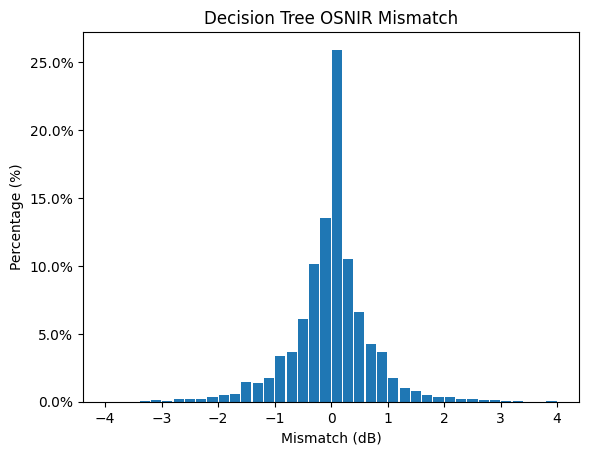

In [10]:
plt.title('Decision Tree OSNIR Mismatch')
plt.xlabel('Mismatch (dB)')
plt.ylabel('Percentage (%)')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.hist(Mism,
         range=(-4,4),
         rwidth=0.9,
         bins=40,
         weights=np.ones(len(Mism))/len(Mism)
         )